# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>
---

**Lab 04**: Data Unions & Joins Pipeline

**Date**: September 23rd 2025

**Student Name**: Juan Bernardo Orozco Quirarte

**Professor**: Pablo Camarillo Ramirez

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on SparkSQL") \
    .master("spark://7d7f1cd1d5d2:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/26 15:28:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Agencies

In [2]:
# Build schema
# Import your module
from lib.bernardoorozco.spark_utils import SparkUtils
from pyspark.sql.functions import from_json
from pyspark.sql.functions import get_json_object

schema_agencies = SparkUtils.generate_schema([("agency_id", "int"), ("agency_info", "string")])

print("Agencies")
df_agencies = spark.read.schema(schema_agencies).option("header", True).csv("/opt/spark/work-dir/data/car_service/agencies")
df_agencies = df_agencies.withColumn("agency_name", get_json_object("agency_info", "$.agency_name"))
df_agencies.show(truncate=False)

Agencies


+---------+-----------------------------------------------------+-------------+
|agency_id|agency_info                                          |agency_name  |
+---------+-----------------------------------------------------+-------------+
|1        |{'agency_name': 'NYC Rentals', 'city': 'New York'}   |NYC Rentals  |
|2        |{'agency_name': 'LA Car Rental', 'city': 'Londres'}  |LA Car Rental|
|3        |{'agency_name': 'Zapopan Auto', 'city': 'Zapopan'}   |Zapopan Auto |
|4        |{'agency_name': 'SF Cars', 'city': 'San Francisco'}  |SF Cars      |
|5        |{'agency_name': 'Mexico Cars', 'city': 'Mexico City'}|Mexico Cars  |
+---------+-----------------------------------------------------+-------------+



### Brands

In [3]:
schema_brands = SparkUtils.generate_schema([("brand_id", "int"), ("brand_info", "string")])

print("Brands")
df_brands = spark.read.schema(schema_brands).option("header", True).csv("/opt/spark/work-dir/data/car_service/brands")
df_brands = df_brands.withColumn("brand_name", get_json_object("brand_info", "$.brand_name"))
df_brands.show(truncate=False)

Brands
+--------+-----------------------------------------------------+-------------+
|brand_id|brand_info                                           |brand_name   |
+--------+-----------------------------------------------------+-------------+
|1       |{'brand_name': 'Mercedes-Benz', 'country': 'Germany'}|Mercedes-Benz|
|2       |{'brand_name': 'BMW', 'country': 'Germany'}          |BMW          |
|3       |{'brand_name': 'Audi', 'country': 'Germany'}         |Audi         |
|4       |{'brand_name': 'Ford', 'country': 'US'}              |Ford         |
|5       |{'brand_name': 'BYD', 'country': 'China'}            |BYD          |
|6       |{'brand_name': 'Honda', 'country': 'Japan'}          |Honda        |
|7       |{'brand_name': 'Toyota', 'country': 'Japan'}         |Toyota       |
+--------+-----------------------------------------------------+-------------+



### Cars

In [4]:
schema_cars = SparkUtils.generate_schema([("car_id", "int"), ("car_info", "string")])

print("Cars")
df_cars = spark.read.schema(schema_cars).option("header", True).csv("/opt/spark/work-dir/data/car_service/cars")
df_cars = (
    df_cars
    .withColumn("car_name", get_json_object("car_info", "$.car_name"))
    .withColumn("brand_id", get_json_object("car_info", "$.brand_id").cast("int"))
    .withColumn("price_per_day", get_json_object("car_info", "$.price_per_day").cast("int"))
)
df_cars.show(truncate=False)

Cars
+------+----------------------------------------------------------------------------------------+------------------------------------+--------+-------------+
|car_id|car_info                                                                                |car_name                            |brand_id|price_per_day|
+------+----------------------------------------------------------------------------------------+------------------------------------+--------+-------------+
|1     |{'car_name': 'Chang-Fisher Model 7', 'brand_id': 5, 'price_per_day': 139}               |Chang-Fisher Model 7                |5       |139          |
|2     |{'car_name': 'Sheppard-Tucker Model 4', 'brand_id': 6, 'price_per_day': 70}             |Sheppard-Tucker Model 4             |6       |70           |
|3     |{'car_name': 'Faulkner-Howard Model 5', 'brand_id': 3, 'price_per_day': 53}             |Faulkner-Howard Model 5             |3       |53           |
|4     |{'car_name': 'Wagner LLC Model 1', 'bra

### Customers

In [5]:
schema_customers = SparkUtils.generate_schema([("customer_id", "int"), ("customer_info", "string")])

print("Customers")
df_customers = spark.read.schema(schema_customers).option("header", True).csv("/opt/spark/work-dir/data/car_service/customers")
df_customers = df_customers.withColumn("customer_name", get_json_object("customer_info", "$.customer_name"))
df_customers.show(truncate=False)

Customers
+-----------+-------------------------------------------------------------------------+--------------------+
|customer_id|customer_info                                                            |customer_name       |
+-----------+-------------------------------------------------------------------------+--------------------+
|1          |{'customer_name': 'Tiffany Riley', 'city': 'Monterrey', 'age': 32}       |Tiffany Riley       |
|2          |{'customer_name': 'Matthew Davies', 'city': 'Monterrey', 'age': 36}      |Matthew Davies      |
|3          |{'customer_name': 'Rebecca Miller', 'city': 'Mexico City', 'age': 30}    |Rebecca Miller      |
|4          |{'customer_name': 'Katelyn Mccoy', 'city': 'New York', 'age': 34}        |Katelyn Mccoy       |
|5          |{'customer_name': 'Dana Dennis', 'city': 'Zapopan', 'age': 26}           |Dana Dennis         |
|6          |{'customer_name': 'Daniel Norton', 'city': 'Mexico City', 'age': 34}     |Daniel Norton       |
|7       

### Rentals

In [6]:
schema_rentals = SparkUtils.generate_schema([("rental_id", "int"), ("rental_info", "string")])

print("Rentals")
df_rentals = spark.read.schema(schema_rentals).option("header", True).csv("/opt/spark/work-dir/data/car_service/rentals")
df_rentals = (
    df_rentals.withColumn("car_id", get_json_object("rental_info", "$.car_id").cast("int")).withColumn("agency_id", get_json_object("rental_info", "$.agency_id").cast("int")).withColumn("customer_id", get_json_object("rental_info", "$.customer_id").cast("int"))
)
df_rentals.show(truncate=False)

Rentals
+---------+--------------------------------------------------+------+---------+-----------+
|rental_id|rental_info                                       |car_id|agency_id|customer_id|
+---------+--------------------------------------------------+------+---------+-----------+
|11891    |{'car_id': 21, 'customer_id': 71, 'agency_id': 1} |21    |1        |71         |
|11892    |{'car_id': 11, 'customer_id': 52, 'agency_id': 2} |11    |2        |52         |
|11893    |{'car_id': 22, 'customer_id': 116, 'agency_id': 4}|22    |4        |116        |
|11894    |{'car_id': 5, 'customer_id': 107, 'agency_id': 1} |5     |1        |107        |
|11895    |{'car_id': 4, 'customer_id': 53, 'agency_id': 4}  |4     |4        |53         |
|11896    |{'car_id': 8, 'customer_id': 131, 'agency_id': 2} |8     |2        |131        |
|11897    |{'car_id': 23, 'customer_id': 66, 'agency_id': 3} |23    |3        |66         |
|11898    |{'car_id': 24, 'customer_id': 60, 'agency_id': 4} |24    |4  

### Join

In [7]:
df_final = (
    df_rentals
    .join(df_cars, "car_id", "left")
    .join(df_agencies, "agency_id", "left")
    .join(df_customers, "customer_id", "left")
    .select("rental_id","car_name","agency_name","customer_name")
)
df_final.show(truncate=False)

+---------+-----------------------------------+-------------+---------------+
|rental_id|car_name                           |agency_name  |customer_name  |
+---------+-----------------------------------+-------------+---------------+
|11891    |Wallace-Carlson Model 9            |NYC Rentals  |Margaret Jones |
|11892    |Grimes-Green Model 8               |LA Car Rental|Albert Williams|
|11893    |Stewart-Allen Model 5              |SF Cars      |Caleb Fleming  |
|11894    |Campos PLC Model 4                 |NYC Rentals  |Andrew Butler  |
|11895    |Wagner LLC Model 1                 |SF Cars      |Kristin Potts  |
|11896    |Jones, Jefferson and Rivera Model 7|LA Car Rental|Jeremy Parks   |
|11897    |Lopez and Sons Model 9             |Zapopan Auto |Terry Wells    |
|11898    |Salazar Ltd Model 8                |SF Cars      |Marc Williams  |
|11899    |Villanueva PLC Model 7             |LA Car Rental|Danny Williams |
|11900    |Faulkner-Howard Model 5            |SF Cars      |Eri

# Persist data

### Parquet file

In [8]:
base_path = "/opt/spark/work-dir/data"

df_final.write \
    .partitionBy("agency_name") \
    .mode("overwrite") \
    .parquet(base_path + "/car_service/output/parquet")

In [23]:
!pwd

/opt/spark/work-dir


In [37]:
!du -sh ../work-dir/data/car_service/output/parquet

144K	../work-dir/data/car_service/output/parquet


In [44]:
!ls ../work-dir/data/car_service/output/parquet

'agency_name=LA Car Rental'  'agency_name=SF Cars'	  _SUCCESS
'agency_name=NYC Rentals'    'agency_name=Zapopan Auto'


### CSV Files

In [11]:
df_final.write \
    .partitionBy("agency_name") \
    .mode("overwrite") \
    .option("header", True) \
    .csv(base_path + "/car_service/output/csv")

In [38]:
!du -sh ../work-dir/data/car_service/output/csv

856K	../work-dir/data/car_service/output/csv


In [39]:
!ls ../work-dir/data/car_service/output/csv

'agency_name=LA Car Rental'  'agency_name=SF Cars'	  _SUCCESS
'agency_name=NYC Rentals'    'agency_name=Zapopan Auto'


In [14]:
df_final.write \
            .mode("overwrite") \
            .option("header", True) \
            .csv(base_path + "/car_service/output/rentals/csv")

In [40]:
!du ../work-dir/data/car_service/output/rentals/csv

1028	../work-dir/data/car_service/output/rentals/csv


In [41]:
!ls ../work-dir/data/car_service/output/rentals/csv

part-00000-f73ce228-d8d7-4349-865d-f766705adcb2-c000.csv  _SUCCESS
part-00001-f73ce228-d8d7-4349-865d-f766705adcb2-c000.csv


In [17]:
df_final.write \
            .mode("overwrite") \
            .parquet(base_path + "/car_service/output/rentals/parquet")

In [42]:
!du -sh ../work-dir/data/car_service/output/rentals/parquet

124K	../work-dir/data/car_service/output/rentals/parquet


In [43]:
!ls ../work-dir/data/car_service/output/rentals/parquet

part-00000-7e61c562-a94a-4777-ad2f-3cd1f80c641f-c000.snappy.parquet  _SUCCESS
part-00001-7e61c562-a94a-4777-ad2f-3cd1f80c641f-c000.snappy.parquet


In [20]:
sc.stop()

## Power BI

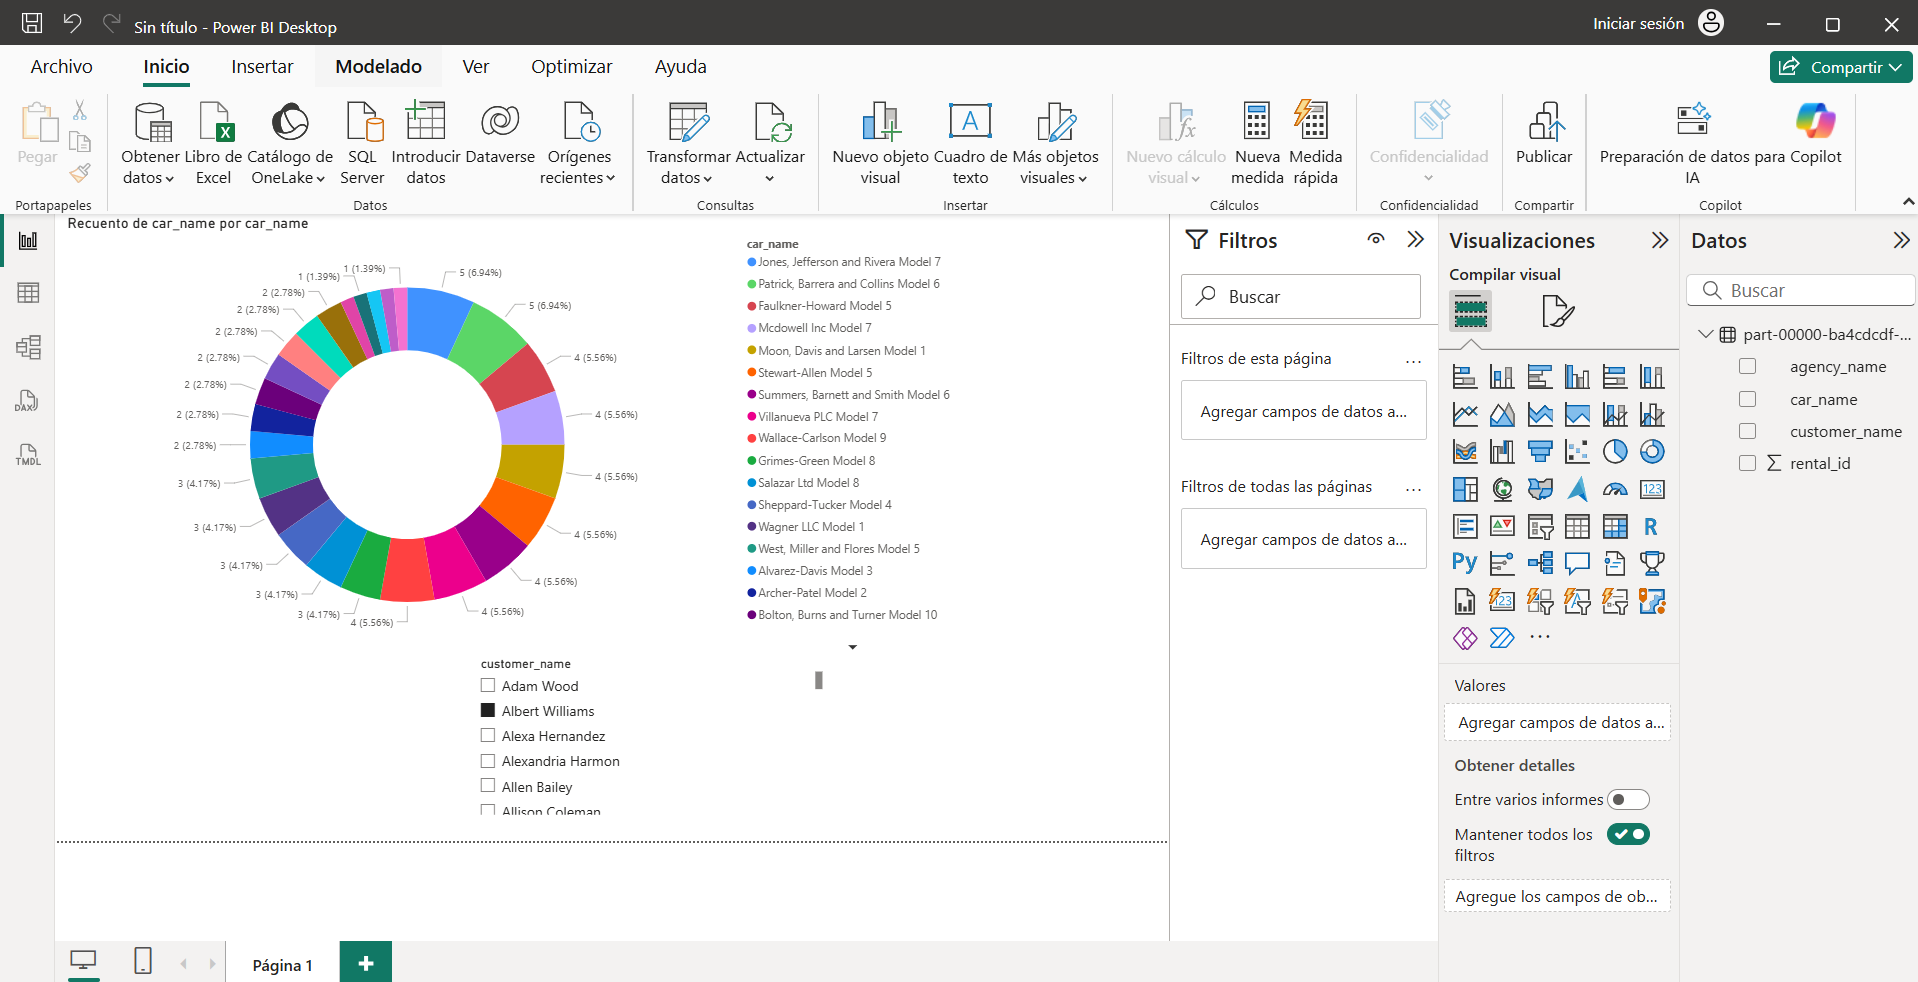